<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Proyecto 01: Clasificación de dígitos

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_projectYY_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Bernardo Recabarren

__Rol__: 201610004-0

## Clasificación de dígitos
En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


## Contenidos
* [K Nearest Neighbours](#k_nearest_neighbours)
* [Exploración de Datos](#data_exploration)
* [Entrenamiento y Predicción](#train_and_prediction)
* [Selección de Modelo](#model_selection)

<a id='k_neirest_neighbours'></a>

## K Nearest Neighbours

El algoritmo **k Nearest Neighbors** es un método no paramétrico: una vez que el parámetro $k$ se ha fijado, no se busca obtener ningún parámetro adicional.

Sean los puntos $x^{(i)} = (x^{(i)}_1, ..., x^{(i)}_n)$  de etiqueta $y^{(i)}$ conocida, para $i=1, ..., m$.

El problema de clasificación consiste en encontrar la etiqueta de un nuevo punto $x=(x_1, ..., x_m)$ para el cual no conocemos la etiqueta.

La etiqueta de un punto se obtiene de la siguiente forma:
* Para $k=1$, **1NN** asigna a $x$ la etiqueta de su vecino más cercano. 
* Para $k$ genérico, **kNN** asigna a $x$ la etiqueta más popular de los k vecinos más cercanos. 

El modelo subyacente a kNN es el conjunto de entrenamiento completo. A diferencia de otros métodos que efectivamente generalizan y resumen la información (como regresión logística, por ejemplo), cuando se necesita realizar una predicción, el algoritmo kNN mira **todos** los datos y selecciona los k datos más cercanos, para regresar la etiqueta más popular/más común. Los datos no se resumen en parámetros, sino que siempre deben mantenerse en memoria. Es un método por tanto que no escala bien con un gran número de datos.

En caso de empate, existen diversas maneras de desempatar:
* Elegir la etiqueta del vecino más cercano (problema: no garantiza solución).
* Elegir la etiqueta de menor valor (problema: arbitrario).
* Elegir la etiqueta que se obtendría con $k+1$ o $k-1$ (problema: no garantiza solución, aumenta tiempo de cálculo).

La cercanía o similaridad entre los datos se mide de diversas maneras, pero en general depende del tipo de datos y del contexto.

* Para datos reales, puede utilizarse cualquier distancia, siendo la **distancia euclidiana** la más utilizada. También es posible ponderar unas componentes más que otras. Resulta conveniente normalizar para poder utilizar la noción de distancia más naturalmente.

* Para **datos categóricos o binarios**, suele utilizarse la distancia de Hamming.

A continuación, una implementación de "bare bones" en numpy:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def knn_search(X, k, x):
    """ find K nearest neighbours of data among D """
    # Distancia euclidiana
    d = np.linalg.norm(X - x, axis=1)
    # Ordenar por cercania
    idx = np.argsort(d)
    # Regresar los k mas cercanos
    id_closest = idx[:k] 
    return id_closest, d[id_closest].max()

def knn(X,Y,k,x):
    # Obtener los k mas cercanos
    k_closest, dmax = knn_search(X, k, x)
    # Obtener las etiquetas
    Y_closest = Y[k_closest]
    # Obtener la mas popular
    counts = np.bincount(Y_closest.flatten())
    # Regresar la mas popular (cualquiera, si hay empate)
    return np.argmax(counts), k_closest, dmax

def plot_knn(X, Y, k, x):
    y_pred, neig_idx, dmax = knn(X, Y, k, x)    
    # plotting the data and the input point
    fig = plt.figure(figsize=(8, 8))
    plt.plot(x[0, 0], x[0, 1], 'ok', ms=16)
    m_ob = Y[:, 0] == 0
    plt.plot(X[m_ob, 0], X[m_ob, 1], 'ob', ms=8)
    m_sr = Y[:,0] == 1
    plt.plot(X[m_sr, 0], X[m_sr, 1], 'sr', ms=8)

    # highlighting the neighbours
    plt.plot(X[neig_idx, 0], X[neig_idx, 1], 'o', markerfacecolor='None', markersize=24, markeredgewidth=1)

    # Plot a circle
    x_circle = dmax * np.cos(np.linspace(0, 2*np.pi, 360)) +  x[0, 0]
    y_circle = dmax * np.sin(np.linspace(0, 2*np.pi, 360)) +  x[0, 1]
    plt.plot(x_circle, y_circle, 'k', alpha=0.25)
    plt.show();

    # Print result
    if y_pred==0:
        print("Prediccion realizada para etiqueta del punto = {} (circulo azul)".format(y_pred))
    else:
        print("Prediccion realizada para etiqueta del punto = {} (cuadrado rojo)".format(y_pred))

Puedes ejecutar varias veces el código anterior, variando el número de vecinos `k` para ver cómo afecta el algoritmo.

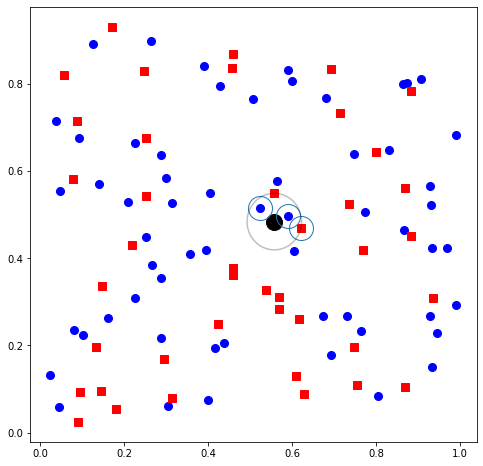

Prediccion realizada para etiqueta del punto = 0 (circulo azul)


In [3]:
k = 3  # hyper-parameter
N = 100
X = np.random.rand(N, 2) # random dataset
Y = np.array(np.random.rand(N) < 0.4, dtype=int).reshape(N, 1) # random dataset
x = np.random.rand(1, 2) # query point

# performing the search
plot_knn(X, Y, k, x)    

<a id='data_exploration'></a>

## Exploración de los datos

A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [4]:
import pandas as pd
from sklearn import datasets

In [5]:
digits_dict = datasets.load_digits()

In [6]:
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
digits_dict.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [8]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [9]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1

**_(10 puntos)_**

**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Veamos primero que nos dice describe de pandas

In [10]:
digits.describe(include='all')

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [11]:
digits.max().unique()

array([ 0,  8, 16, 15,  2, 12,  1, 14,  4,  6, 13,  9])

In [12]:
digits.min().unique()

array([0])

In [13]:
digits.isnull().any(axis=0).unique()

array([False])

Se ve que los máximos y mínimos de target estan dentro del rango esperado, pero dentro de la escala de grises los valores van desde el 0 hasta el 16 los valores.
Dentro de la revisión de valores nulos, no se presenta ninguno en la matriz.

In [14]:
digits.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
c00       1797 non-null int64
c01       1797 non-null int64
c02       1797 non-null int64
c03       1797 non-null int64
c04       1797 non-null int64
c05       1797 non-null int64
c06       1797 non-null int64
c07       1797 non-null int64
c08       1797 non-null int64
c09       1797 non-null int64
c10       1797 non-null int64
c11       1797 non-null int64
c12       1797 non-null int64
c13       1797 non-null int64
c14       1797 non-null int64
c15       1797 non-null int64
c16       1797 non-null int64
c17       1797 non-null int64
c18       1797 non-null int64
c19       1797 non-null int64
c20       1797 non-null int64
c21       1797 non-null int64
c22       1797 non-null int64
c23       1797 non-null int64
c24       1797 non-null int64
c25       1797 non-null int64
c26       1797 non-null int64
c27       1797 non-null int64
c28       1797 non-null int64
c29       1797 non-null

Todas las columnas son del tipo int64, por lo que no tendremos problemas con algun dato tipo string, así estamos utilizando un buen tipo de dato para los rangos de valores que trabajaremos en este dataframe, esto nos permite utilizar una memoria de solo 912.7KB

Se observa que se tienen 1797 datos de números registrados en el dataframe

Ahora veamos como distribuyen los target de la base de datos

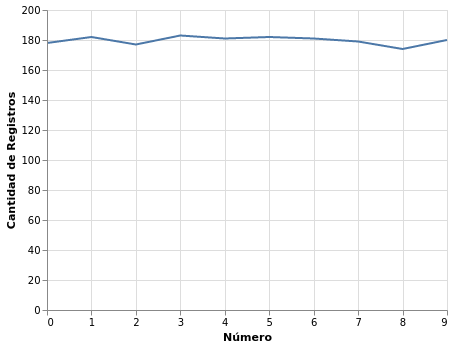

In [15]:
import altair as alt

alt.Chart(digits).mark_line().encode(
    x=alt.X('target',title='Número'),
    y=alt.Y('count()',title='Cantidad de Registros')
)

A simple vista, se ve que el registro de números parece ser una distribución uniforme. 

### Ejercicio 2

**_(10 puntos)_**

**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [16]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

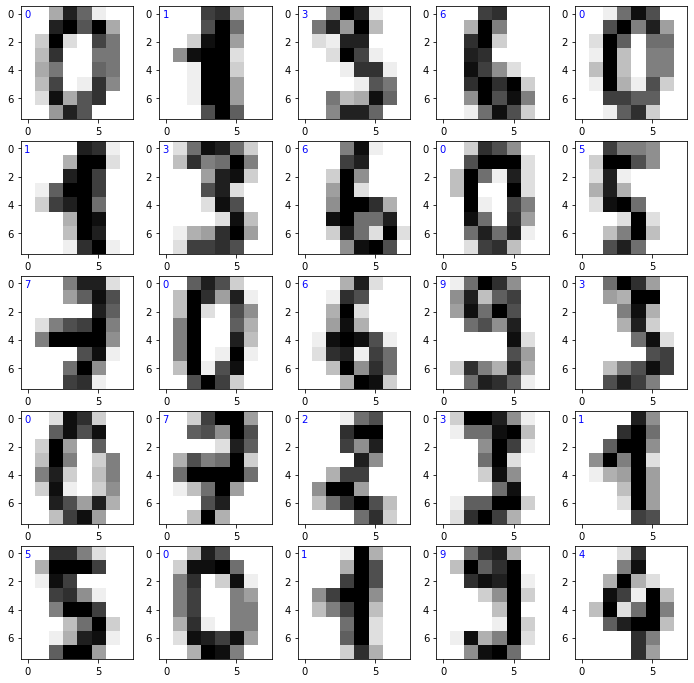

In [17]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
count=0
for i in range(nx):
    for j in range(ny):
        count+= i+j
        axs[i][j].imshow(digits_dict['images'][count],cmap='binary')
        axs[i][j].text(-0.25,0.25,digits_dict['target'][count],color='blue')

Así dejamos en azul el valor del numero según el dataframe

<a id='train_and_prediction'></a>

## Entrenamiento y Predicción

Se utilizará la implementación de `scikit-learn` llamada `KNeighborsClassifier` (el cual es un _estimator_) que se encuentra en `neighbors`.

Utiliza la métrica por defecto.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
X = digits.drop(columns="target").values
y = digits["target"].values

### Ejercicio 3

**_(10 puntos)_**

Entrenar utilizando todos los datos. Además, recuerda que `k` es un hiper-parámetro, por lo tanto prueba con distintos tipos `k` y obten el `score` desde el modelo.

In [20]:
k_array = np.arange(1, 101)

In [21]:
for i in k_array:
    kneig_digits= KNeighborsClassifier(n_neighbors=i)
    kneig_digits.fit(X,y)
    print(f'El puntaje para el hiper-parámetro k='+ str(i)+ ' es de ' + str(kneig_digits.score(X,y))+'')

El puntaje para el hiper-parámetro k=1 es de 1.0
El puntaje para el hiper-parámetro k=2 es de 0.9910962715637173
El puntaje para el hiper-parámetro k=3 es de 0.993322203672788
El puntaje para el hiper-parámetro k=4 es de 0.9922092376182526
El puntaje para el hiper-parámetro k=5 es de 0.9905397885364496
El puntaje para el hiper-parámetro k=6 es de 0.989983305509182
El puntaje para el hiper-parámetro k=7 es de 0.9905397885364496
El puntaje para el hiper-parámetro k=8 es de 0.9894268224819143
El puntaje para el hiper-parámetro k=9 es de 0.9888703394546466
El puntaje para el hiper-parámetro k=10 es de 0.9855314412910406
El puntaje para el hiper-parámetro k=11 es de 0.988313856427379
El puntaje para el hiper-parámetro k=12 es de 0.9877573734001113
El puntaje para el hiper-parámetro k=13 es de 0.986644407345576
El puntaje para el hiper-parámetro k=14 es de 0.9860879243183083
El puntaje para el hiper-parámetro k=15 es de 0.9855314412910406
El puntaje para el hiper-parámetro k=16 es de 0.98441

**Preguntas**

* ¿Cuál fue la métrica utilizada?
* ¿Por qué entrega estos resultados? En especial para k=1.
* ¿Por qué no se normalizó o estandarizó la matriz de diseño?

La métrica utilizada fue la de precisión, la cual es una métrica de clasificación, que es lo que hace este modelo de predicción. 

Entrega peores resultados a medida que k es más grande, tiene sentido, ya que el objetivo del método es la clasificación según las vecindades, si se hace mas grande la vecindad, se le agrega más incertidumbre.

En k=1 se tiene un 100% de precisión, debido a que se entreno con todos los datos, y

La matriz de diseño no se normalizo para evitar primero problemas con los errores de computo, y segundo para no modificar los valores de esta al momento de hacer el análisis

### Ejercicio 4

**_(10 puntos)_**

Divide los datos en _train_ y _test_ utilizando la función preferida del curso. Para reproducibilidad utiliza `random_state=42`. A continuación, vuelve a ajustar con los datos de _train_ y con los distintos valores de _k_, pero en esta ocasión calcula el _score_ con los datos de _test_.

¿Qué modelo escoges?

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [24]:
for i in k_array:
    kneig_digits= KNeighborsClassifier(n_neighbors=i)
    kneig_digits.fit(X_train,y_train)
    print(f'El puntaje para el hiper-parámetro k='+ str(i)+ ' es de ' + str(kneig_digits.score(X_test,y_test))+'')

El puntaje para el hiper-parámetro k=1 es de 0.9777777777777777
El puntaje para el hiper-parámetro k=2 es de 0.9805555555555555
El puntaje para el hiper-parámetro k=3 es de 0.9833333333333333
El puntaje para el hiper-parámetro k=4 es de 0.9805555555555555
El puntaje para el hiper-parámetro k=5 es de 0.9861111111111112
El puntaje para el hiper-parámetro k=6 es de 0.9888888888888889
El puntaje para el hiper-parámetro k=7 es de 0.9888888888888889
El puntaje para el hiper-parámetro k=8 es de 0.9861111111111112
El puntaje para el hiper-parámetro k=9 es de 0.9805555555555555
El puntaje para el hiper-parámetro k=10 es de 0.9833333333333333
El puntaje para el hiper-parámetro k=11 es de 0.9833333333333333
El puntaje para el hiper-parámetro k=12 es de 0.9777777777777777
El puntaje para el hiper-parámetro k=13 es de 0.9777777777777777
El puntaje para el hiper-parámetro k=14 es de 0.9805555555555555
El puntaje para el hiper-parámetro k=15 es de 0.9805555555555555
El puntaje para el hiper-parámetro

<a id='model_selection'></a>

Ya es mas dificil escoger el modelo, pero se ve que va decreciento a medida que el hiper-parámetro crece, así que conviene tomarlo con el menor valor posible

## Selección de Modelo

### Ejercicio 5

**_(15 puntos)_**


**Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada.

¿Qué podrías decir de la elección de `k`?

In [25]:
from sklearn.model_selection import validation_curve

In [26]:
param_range = np.arange(1, 101)

In [27]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X, y, param_range=param_range, param_name='n_neighbors',
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



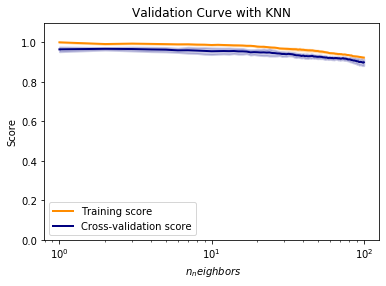

<Figure size 864x576 with 0 Axes>

In [28]:
plt.title("Validation Curve with KNN")
plt.xlabel(r"$\ n_neighbors$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.figure(figsize=(12, 8))
plt.show();

**Pregunta**

* ¿Qué refleja este gráfico?
* ¿Qué conclusiones puedes sacar a partir de él?
* ¿Qué patrón se observa en los datos, en relación a los números pares e impares? ¿Porqué sucede esto?

El gráfico refleja el Score obtenido según el hiperparámetro n_neighbors del método KNN

Se puede ver que mientras más crezca el hiperparámetro, más baja el score, lo que tiene sentido según lo que se dijo anteriormente.

El patrón general es indiferente entre números pares e impares, lo que nos muestra que la decisión del algoritmo al tener vecinos pares y un empate, no afecta al patrón general, es decir, la decisión arbitraria de decisión frente a un empate no afecta a que el Score sea decreciente mientras más crezca la cantidad de vecinos

### Ejercicio 6

**_(15 puntos)_**

**Búsqueda de hiper-parámetros con validación cruzada:** Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación del parámetro _k_. Prueba con valores de _k_ desde 2 a 100.

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
parameters = {'n_neighbors': np.arange(2,101)}
digits_gscv = GridSearchCV(estimator= KNeighborsClassifier(),param_grid=parameters)
digits_gscv.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  

In [31]:
digits_gscv.best_params_

{'n_neighbors': 2}

**Pregunta**

* ¿Cuál es el mejor valor de _k_?
* ¿Es consistente con lo obtenido en el ejercicio anterior?

El mejor valor es $k=2$, lo que es consistente, ya que se mostraba en el ejercicio anterior una pendiente negativa de Score/N_Neighbors

### Ejercicio 7

**_(10 puntos)_**

__Visualizando datos:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 

* Define la variable `best_knn` que corresponde al mejor estimador `KNeighborsClassifier` obtenido.
* Ajusta el estimador anterior con los datos de entrenamiento.
* Crea el arreglo `y_pred` prediciendo con los datos de test.

_Hint:_ `digits_gscv.best_estimator_` te entrega una instancia `estimator` del mejor estimador encontrado por `GridSearchCV`.

In [32]:
best_knn =KNeighborsClassifier(n_neighbors=2)
best_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [33]:
y_pred = best_knn.predict(X_test)

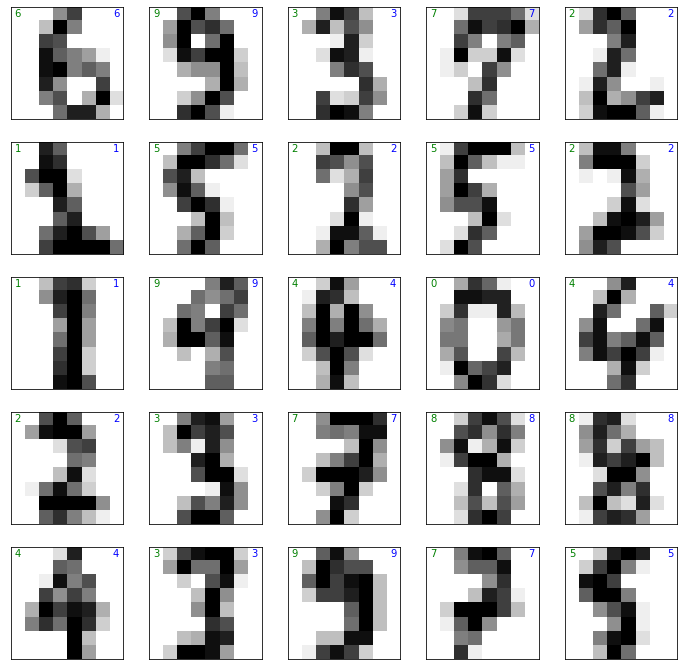

In [34]:
# Mostrar los datos correctos
mask = (y_pred == y_test)
X_aux = X_test[mask]
y_aux_true = y_test[mask]
y_aux_pred = y_pred[mask]

# We'll plot the first 100 examples, randomly choosen
nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j + ny * i
        data  = X_aux[index, :].reshape(8,8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color='green')
        ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

Modifique el código anteriormente provisto para que muestre los dígitos incorrectamente etiquetados, cambiando apropiadamente la máscara. Cambie también el color de la etiqueta desde verde a rojo, para indicar una mala etiquetación. 

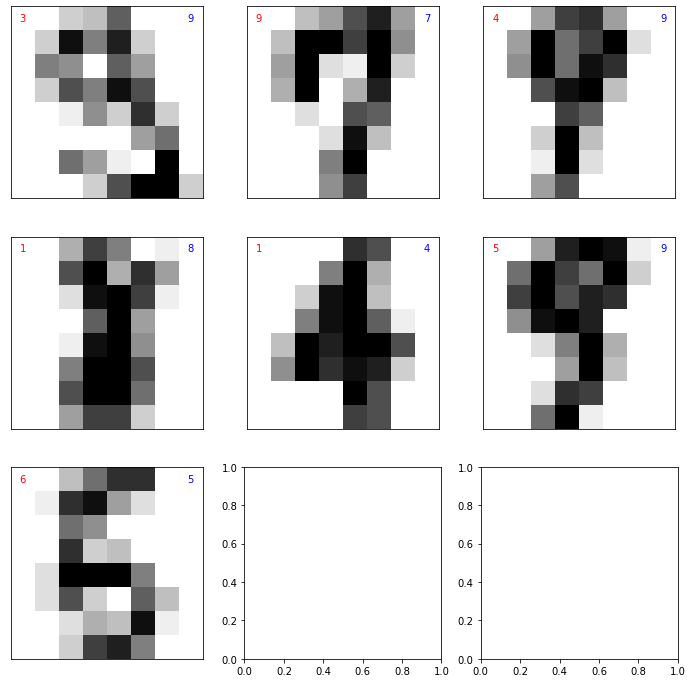

In [37]:
mask = (y_pred != y_test)
X_aux = X_test[mask]
y_aux_true = y_test[mask]
y_aux_pred = y_pred[mask]

# We'll plot the first 100 examples, randomly choosen
nx, ny = 3, 3
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j + ny * i
        try:
            data  = X_aux[index, :].reshape(8,8)
        except:
            break
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color='red')
        ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

**Pregunta**

* Solo utilizando la inspección visual, ¿Por qué crees que falla en esos valores?

Falla primero por los rasgos parecidos de los números, por ejemplo el 6 y el 5, en los otros casos los dibujos de los números no son parecidos al número que se quiere indicar, así que es normal que el método falle con estos números.

### Ejercicio 8

**_(10 puntos)_**

**Matriz de confusión:** Grafica la matriz de confusión.

**Importante!** Al principio del curso se entregó una versión antigua de `scikit-learn`, por lo cual es importante que actualicen esta librearía a la última versión para hacer uso de `plot_confusion_matrix`. Hacerlo es tan fácil como ejecutar `conda update -n mat281 -c conda-forge scikit-learn` en la terminal de conda.

In [38]:
from sklearn.metrics import plot_confusion_matrix

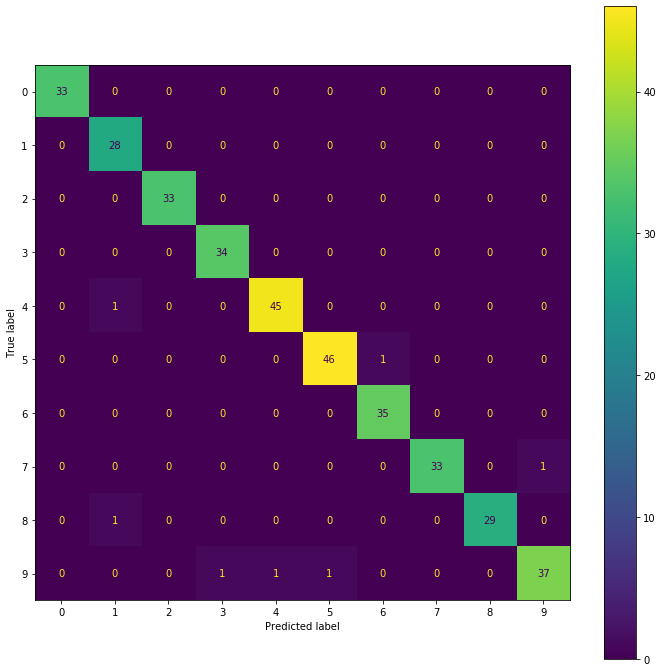

In [39]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(best_knn, X_test, y_test, ax=ax, cmap=plt.cm.viridis)

**Pregunta**

* ¿Cuáles son las etiquetas con mejores y peores predicciones?
* Con tu conocimiento previo del problema, ¿Por qué crees que esas etiquetas son las que tienen mejores y peores predicciones?

Las mejor etiqueta corresponde al número 0, y la peor el número 9, lo que tiene sentido, ya que el 9 tiene trazos parecidos al 3,4,5 dependiendo del estilo de escritura de las personas.
Por otro lado, el 0 se realiza en un solo trazo, y es dificil escribirlo de una manera incomprensible.

### Ejercicio 9

**_(10 puntos)_**

**Curva de aprendizaje:** Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py) pero solo utilizando un modelo de KNN con el hiperparámetro _k_ seleccionado anteriormente. 

In [40]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [41]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

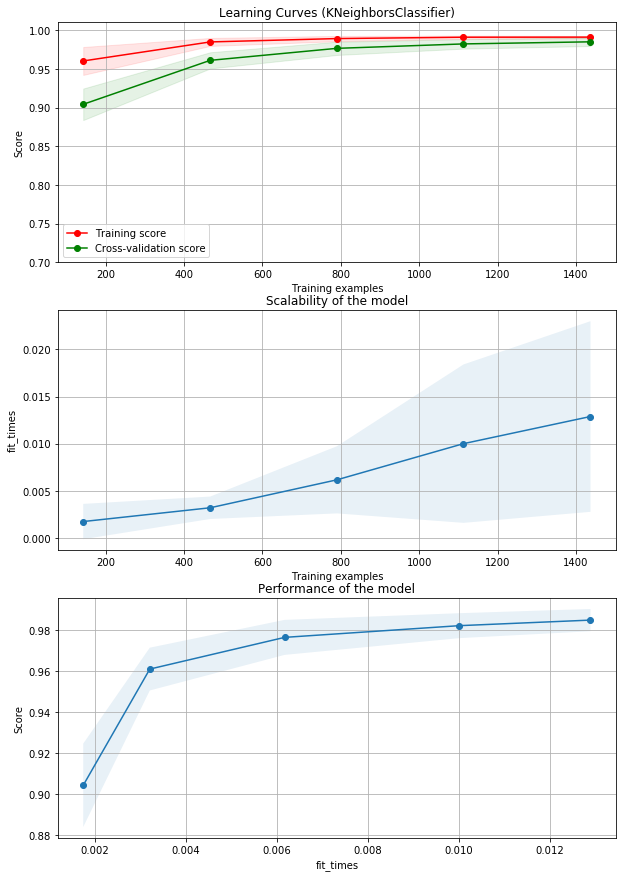

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (KNeighborsClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = best_knn
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
plt.show()


**Pregunta**

* ¿Qué refleja este gráfico?
* ¿Qué conclusiones puedes sacar a partir de él?
* ¿En qué crees que hay que poner más atención a la hora de trabajar con un problema de clasificación?

El primer gráfico nos muestra como crece el Score del modelo mientras se entrena con más datos, se ve que es creciente y que a partir de 1200 datos, se va volviendo irrelevante el aumento del score en comparación a el aumento de los datos de entrenamiento.

El segundo gráfico nos muestra como crece el tiempo de entrenamiento al momento de incrementar el número de datos, en este caso se ve que es creciente, pero no con una pendiente muy acelerada.

El tercer gráfico hace la relación a lo que se dijo anteriormente, que si aumenta el tiempo de entrenamiento, entonces aumentará el Score del modelo entregado

Hay que poner atención primero a la escalabilidad del modelo, ver cuantos datos tenemos y que tipo de modelo nos conviene según la cantidad de datos que tengamos, nos interesa que nuestro modelo se adapte a la situación en la que estamos, haciendo el trade off entre cantidad de datos, y precisión del modelo, así buscar el mejor que balancee estos ámbitos